## Relatório sobre violencia armada nos Estados Unidos

### Esse relatório contém análises feitas a partir de um dataset público, disponível no kaggle.

<h4 align='center'>Equipe:<br>Marcos Lúnciel<br>Ítalo Ramillys<br>Ubiratan Júnior<br></h4>
    

<h1 align='center'> Carregando bibliotecas e DataSet</h1>

In [1]:


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')

In [2]:
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.ch

<h1 align='center'> Numero médio de pessoas feridas </h1>


Dados importantes a serem considerados sobre os EUA:
- 4,4% da população global 
- 42% das armas do mundo 
- 31% de tiroteios em todo o mundo

Fonte: [ Visualização de dados produzida por Fernanda Bezerra](https://nandabezerran.github.io/DataVisualization/TrabalhoFinal/index.html)

In [3]:
mediaNumeroFeridos = pd.DataFrame(df,columns=['n_injured'])
mediaNumeroFeridos.mean()

n_injured    0.494007
dtype: float64

<h1 align='center'> 5 estados com mais crimes a mão armada</h1>

### Análise de Estados com mais crimes:
- A Califórnia é o estado com mais ocorrências e mortes nos últimos anos. 
- Assim como Califórnia apresenta a maior quantidade de tiroteios ocorridos nos EUA até 2017, também é o segundo estado com maior ocorrência de crimes registrados entre 2013-2018 no site [Gun Violence Archive](http://www.gunviolencearchive.org.)
    
Fonte: [ Visualização de dados produzida por Fernanda Bezerra](https://nandabezerran.github.io/DataVisualization/TrabalhoFinal/index.html)

### 1. Realizando contagem  e agrupando os estados com mais ocorrências de crimes no DataSet:

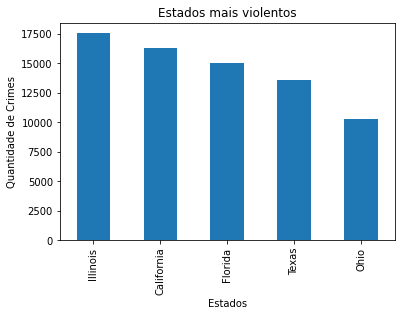

In [4]:
df["state"].value_counts().head().plot.bar()
plt.xlabel('Estados') 
plt.ylabel('Quantidade de Crimes') 
plt.title('Estados mais violentos') 
plt.show()

<h2 align='center'>Panorama da situação dos estados unidos a partir dos dados analisados:</h2>

Segundo o site [Neighborhood Scout](https://www.neighborhoodscout.com/ca/crime):

- California possui +30 cidades consideradas "Perigosas" ou "Muito perigosa". 
- Em nosso dataset é possível perceber que California apresenta o segundo maior número de crimes registrados.

Comparando os dois fatos acima é facil perceber a relação direta entre os dados. Em um estado como California que possui 482 cidades e +30 são "Perigosa" ou "Muito Perigosa" pode parecer um número baixo, mas se você considerar que nessas +30 estão as maiores ou mais famosas cidades dos EUA como Los Angeles, San Francisco, San Diego, San Jose esse número se torna muito preocupante. 


<ul>
    
<li>Taxa de criminalidade California(por 1.000 residentes)</li>
<li>Crimes violentos: 4,47</li>
<li>Crimes em propriedades(furto, roubo, incêndio criminoso, furtos em lojas e vandalismo): 23,80</li>
<li>A chances de se torna uma vítima de crime violenta na California é de 1 em 224 crimes</li>

</ul>
   
   
*Diferentemente da maioria dos outros estados, a Califórnia não possui provisão em sua constituição estadual que garante explicitamente o direito individual de manter e portar armas. Armas de fogo semi-automática, rifles calibre 50 e pentes de munição de alta capacidade não podem ser vendidos no estado. Armas automáticas e escopetas são proibidas no estado a menos que o cidadão possua Dangerous Weapons Permit(um tipo de licença)*


Em um estado com tantas restrições sobre as armas como a California ser considerado o segundo estado com maior quantidade de crimes é algo 

- - -

<h1 align='center'> Análise de procedência das armas que aparecem nos crimes de todo o país</h1>

A partir do panorama anterior, e dado que nos Estados Unidos o comércio de armas é legal em grande parte dos estados, é importante observar se o país sofre com tanta violência por conta dessa liberdade, ou se os crimes/incidentes ocorrem com armamento irregular.

### 1. Criando um recorte do DataFrame original e tratando seus dados.


In [5]:
df_top_armas = pd.DataFrame(df, columns=['gun_stolen','gun_type']).dropna()

df_top_armas = pd.DataFrame(df_top_armas.apply(lambda x: x.str.split('\|\|').explode()), columns=['gun_stolen','gun_type'])
df_top_armas = pd.DataFrame(df_top_armas.apply(lambda x: x.str.split('::').explode()).reset_index(), columns=['gun_stolen','gun_type'])

# redundancia usada para tratar dados com erro na sintaxe 
df_top_armas = pd.DataFrame(df_top_armas.apply(lambda x: x.str.split('\|').explode()),columns=['gun_stolen','gun_type'])
df_top_armas = pd.DataFrame(df_top_armas.apply(lambda x: x.str.split(':').explode()).reset_index(), columns=['gun_stolen','gun_type'])


- No DataFrame, a seguinte stratégia é usada por padrão para agrupar participantes nos casos listados.  
    - `||` Separam dados relacionados a participantes diferentes
    - `::` Separam um número *n* atribuido a cada participante, que funciona como uma espécie de identificador que é único apenas naquela linha,  e o dado referente ao participante de número *n*.


- A partir desse entendimento tratamos os dados usando funções `lambda` da seguinte forma:
   
   1. Usamos o método `split()` para quebrar o texto nos caracteres usados para separação no dataframe, gerando um array.
      
   2. Usamos o método `explode()` para fazer com que cada elemento do array se torne uma nova linha do dataframe.
   
   3. Usamos o método `reset_index()` para reatribuir índices únicos a cada linha do dataframe.

### 2. Agrupando top 10 armas que são de posse de quem está portando durante a ocorrência:
    
  - Devido à estratégia usada na célula passada, temos dados que informam sobre as armas apenas em linhas ímpares, as linhas pares são os numéros atribuidos aos dados. **(Essa regra também se aplica aos agrupamentos feitos nos próximos tópicos)**

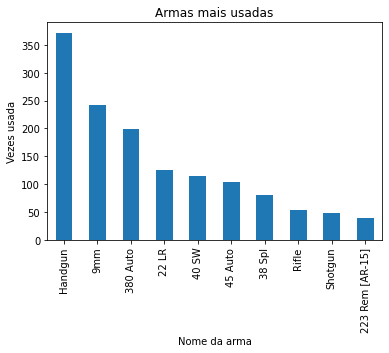

In [6]:
top10_armas_nao_roubadas = df_top_armas[(df_top_armas.gun_type.index % 2 != 0) 
                          & (df_top_armas.gun_type != 'Unknown')
                          & (df_top_armas.gun_stolen == 'Not-stolen')].gun_type.value_counts().head(10)
top10_armas_nao_roubadas.plot.bar()

plt.xlabel('Nome da arma') 
plt.ylabel('Vezes usada') 
plt.title('Armas mais usadas') 
plt.show()

### 3. Agrupando top 10 armas que **não** são de posse de quem está a portando durante a ocorrência:

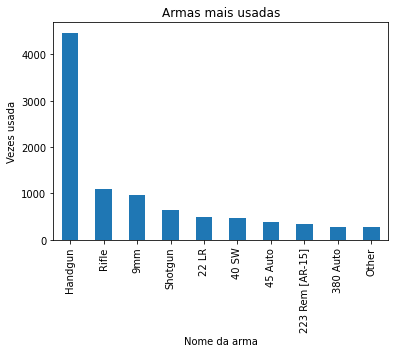

In [7]:
top10_armas_roubadas =  df_top_armas[(df_top_armas.gun_type.index % 2 != 0) 
                                    &(df_top_armas.gun_type != 'Unknown') 
                                    &(df_top_armas.gun_stolen == 'Stolen') ].gun_type.value_counts().head(10)

top10_armas_roubadas.plot.bar()
plt.xlabel('Nome da arma') 
plt.ylabel('Vezes usada') 
plt.title('Armas mais usadas') 
plt.show()

### 4. Agrupando top 10 armas que **não se sabe a procedência**:

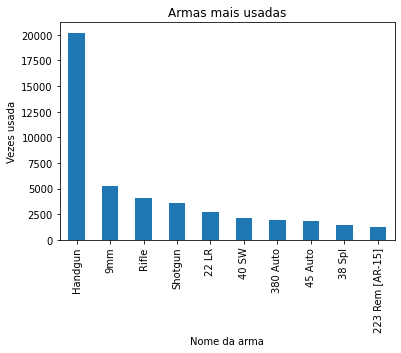

In [8]:
top10_armas_sem_proc = df_top_armas[(df_top_armas.gun_type.index % 2 != 0) 
                          & (df_top_armas.gun_type != 'Unknown')
                          & (df_top_armas.gun_stolen == 'Unknown')].gun_type.value_counts().head(10)

top10_armas_sem_proc.plot.bar()
plt.xlabel('Nome da arma') 
plt.ylabel('Vezes usada') 
plt.title('Armas mais usadas') 
plt.show()

### 5. Visualização que relaciona a arma com maiores índices nos tópicos 2 a 4:

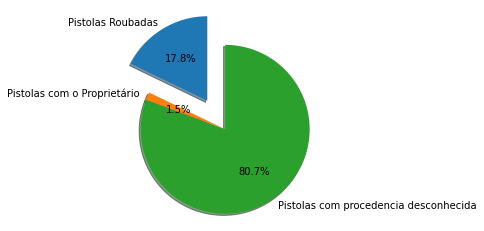

In [9]:
values = []
values.append(int(top10_armas_roubadas['Handgun']))
values.append(int(top10_armas_nao_roubadas['Handgun']))
values.append(int(top10_armas_sem_proc['Handgun']))

labels = 'Pistolas Roubadas','Pistolas com o Proprietário','Pistolas com procedencia desconhecida'

explode = (0.4, 0,0)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

<h2 align='center'>Conclusões com os dados analisados:</h2>

É visível que pistolas(Handgun) são o tipo de arma mais comum durante crimes, porém, somente em menos de 20% das ocorrências se sabe a procedência das armas, o que não nos dá um poder de conclusões concretas sobre o a influência do porte livre de armas sobre os acidentes/crimes, mas ainda sim, existe um indicio de que a influência é mínima visto que a quantidade de casos com armas roubadas é  10 vezes superior à quantidade de casos com armas nas mãos de seus proprietários.

- - -

<h1 align='center'>Número de suspeitos com +18 vs. -18</h1>

### 1. Criando recorte com as colunas que agrupam os participantes por *grupos de idade* e *tipo de participante*:
        
        1.1 Os grupos de idade são: Adult 18+, Teen 12-17, Child 0-11      
        1.2 Os tipos de participante sao: Victim, Subject-suspect
       
        

In [10]:
participants = pd.DataFrame(df,columns=['participant_age_group','participant_type']).dropna()

### 2. Fazendo contagem dos participantes que não são vítimas:

In [11]:

participantsGroupDistintos = []
for i in range(participants.shape[0]):
    ageGroupPorLinha = participants.values[i][0]
    typePorLinha = participants.values[i][1]
    
    ageGroupSeparados = ageGroupPorLinha.split('||')
    typeSeparados = typePorLinha.split('||')
    
    for j in range(len(ageGroupSeparados)):
        if("Victim" not in typeSeparados[j]):
            if("::" in ageGroupSeparados[j]):
                participantsGroupDistintos.append(ageGroupSeparados[j].split('::')[1])


 - Diferente da [Análise de procedência das armas](#-Análise-de-procedência-das-armas-que-aparecem-nos-crimes-de-todo-o-país), aqui o método `explode()` não pode ser usado para gerar novas colunas do nosso recorte, devido à algumas ocorrências de *missing data* em linhas da coluna `participante_type`, o que gerava quantidade diferente de entradas nas colunas. Então utilizamos uma estratégia básica de contagem com  base nos separadores padrão, que segue a mesma idéia da contagem feita anteriormente
.

### 3. **Agrupando os participantes suspeitos  de realizar o crime, por faixa etária**:

In [12]:
participantsDF = pd.DataFrame(participantsGroupDistintos,columns=['Faixa_Etaria'])

adultos = participantsDF[participantsDF.Faixa_Etaria == 'Adult 18+'].Faixa_Etaria.value_counts().sum()
menores = participantsDF[participantsDF.Faixa_Etaria != 'Adult 18+'].Faixa_Etaria.value_counts().sum()
faixaEtaria = [adultos,menores]
pd.DataFrame(faixaEtaria,columns=['Quantidade'], index=['Adultos','Menores'])

,Quantidade
Adultos,144462
Menores,13063


<AxesSubplot:ylabel='Faixa_Etaria'>

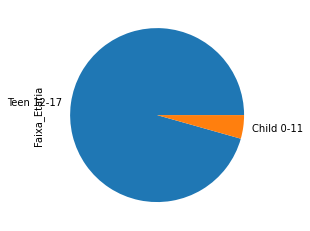

In [13]:
participantsDF[participantsDF.Faixa_Etaria != 'Adult 18+'].Faixa_Etaria.value_counts().plot.pie()


Pelos dados onde houveram registros das idades dos participantes, a análise nos mostra que o número de participações de menores nos crime abordados é bastante pequeno, cerca de 9.04% em relação ao total. 

O que nos poderia dar a ideia de que a maior idade cumpre seu papel nos EUA, além disso, vale ressaltar que tratando **o grupo de menores como um todo** e olhando para os que responderiam em julgado por seu crime na região, temos uma quantidade representativa de adolescentes em uma faixa etária que vai de 12-17 anos. O que nos leva a considerar que, se por acaso, a idade em que tais indivíduos tivessem que responder por suas ações fosse maior, uma quantidade considerável dos crimes de menores sairiam impunes.

###### Obs: Na maioria dos estados do país, adolescentes com mais de 12 anos podem ser submetidos aos mesmos procedimentos dos adultos, inclusive com a imposição de pena de morte ou prisão perpétua. O país não ratificou a Convenção Internacional sobre os Direitos da Criança.

Tonte: [Ministério Público do Paraná](https://crianca.mppr.mp.br/pagina-323.html)

- - - 

<h1 align='center'> Analisando a violência em datas específicas ao longo dos anos </h1>

###   Criando recorte do DataFrame
Utilizaremos apenas resultados que ocorreram entre os anos de 2014 a 2017, pois o DataFrame não cobre os anos de 2013 e 2018 por completo.

In [14]:
dates = pd.DataFrame(df,columns=['date','n_killed','n_injured']).dropna()
dates['date'] = pd.to_datetime(dates['date'])
dates['year'] = dates['date'].dt.year
dates = (dates[(dates.year > 2013) & (dates.year < 2018) ])


Se listarmos os dias em que ocorrem mais violência veremos que o feriado de Ação de Graças e o Ano Novo, ambos do ano de 2017, aparecem como os 2 dias que mais tiveram ocorrências no periodo do recorte.

In [15]:
pd.DataFrame(dates.date.value_counts().head())


,date
2017-01-01,342
2017-07-04,248
2017-05-28,242
2016-08-28,230
2017-04-16,229


<h3 align='center'> Análise do dia 4 de Julho (Dia da Independência norte-americana)</h3>

### Para o ano de 2014

In [16]:
IDano2014 = dates[dates.date == pd.to_datetime('2014-07-04')]
print("Número de incidências: %d" %IDano2014.shape[0])
print("Numéro de mortos: %d" %IDano2014.n_killed.sum())
print("Número de feridos: %d" %IDano2014.n_injured.sum())

Número de incidências: 192
Numéro de mortos: 48
Número de feridos: 92


### Para o ano de 2015

In [17]:
IDano2015 = dates[dates.date == pd.to_datetime('2015-07-04')]
print("Número de incidências: %d" %IDano2015.shape[0])
print("Numéro de mortos: %d" %IDano2015.n_killed.sum())
print("Número de feridos: %d" %IDano2015.n_injured.sum())

Número de incidências: 211
Numéro de mortos: 60
Número de feridos: 142


### Para o ano de 2016

In [18]:
IDano2016 = dates[dates.date == pd.to_datetime('2016-07-04')]
print("Número de incidências: %d" %IDano2016.shape[0])
print("Numéro de mortos: %d" %IDano2016.n_killed.sum())
print("Número de feridos: %d" %IDano2016.n_injured.sum())

Número de incidências: 224
Numéro de mortos: 53
Número de feridos: 163


### Para o ano de 2017

In [19]:
IDano2017 = dates[dates.date == pd.to_datetime('2017-07-04')]
print("Número de incidências: %d" %IDano2017.shape[0])
print("Numéro de mortos: %d" %IDano2017.n_killed.sum())
print("Número de feridos: %d" %IDano2017.n_injured.sum())

Número de incidências: 248
Numéro de mortos: 62
Número de feridos: 146


Utilizados para esta análise os dados relativos aos anos de 2014 à 2017. Como vimos, existe um número elevado de incidentes relacionados aos dias 4 e 5 de julho, onde temos um importante feriado para o país, tornando-as uma das datas mais perigosas do ano.

<h3 align='center'> Análise do dia 01 de Janeiro</h3>

### Para o ano de 2014

In [20]:
NYano2014 = dates[dates.date == pd.to_datetime('2014-01-01')]
print("Número de incidências: %d" %NYano2014.shape[0])
print("Numéro de mortos: %d" %NYano2014.n_killed.sum())
print("Número de feridos: %d" %NYano2014.n_injured.sum())

Número de incidências: 216
Numéro de mortos: 50
Número de feridos: 132


### Para o ano de 2015

In [21]:
NYano2015 = dates[dates.date == pd.to_datetime('2015-01-01')]
print("Número de incidências: %d" %NYano2015.shape[0])
print("Numéro de mortos: %d" %NYano2015.n_killed.sum())
print("Número de feridos: %d" %NYano2015.n_injured.sum())

Número de incidências: 214
Numéro de mortos: 61
Número de feridos: 122


### Para o ano de 2016

In [22]:
NYano2016 = dates[dates.date == pd.to_datetime('2016-01-01')]
print("Número de incidências: %d" %NYano2016.shape[0])
print("Numéro de mortos: %d" %NYano2016.n_killed.sum())
print("Número de feridos: %d" %NYano2016.n_injured.sum())

Número de incidências: 221
Numéro de mortos: 61
Número de feridos: 114


### Para o ano de 2017

In [23]:
NYano2017 = dates[dates.date == pd.to_datetime('2017-01-01')]
print("Número de incidências: %d" %NYano2017.shape[0])
print("Numéro de mortos: %d" %NYano2017.n_killed.sum())
print("Número de feridos: %d" %NYano2017.n_injured.sum())

Número de incidências: 342
Numéro de mortos: 74
Número de feridos: 179


<h2 align='center'> Visualizando os dados analisados</h2>

Primeiro vamos selecionar os dias mais perigosos de cada ano

In [24]:
top2014 = dates[dates.year == 2014].date.value_counts().head(3)
top2014

2014-09-06    220
2014-01-01    216
2014-07-05    212
Name: date, dtype: int64

In [25]:
top2015 = dates[dates.year == 2015].date.value_counts().head(3)
top2015

2015-01-01    214
2015-07-04    211
2015-07-05    209
Name: date, dtype: int64

In [26]:
top2016 = dates[dates.year == 2016].date.value_counts().head(3)
top2016

2016-08-28    230
2016-08-21    227
2016-07-04    224
Name: date, dtype: int64

In [27]:
top2017 = dates[dates.year == 2017].date.value_counts().head(3)
top2017

2017-01-01    342
2017-07-04    248
2017-05-28    242
Name: date, dtype: int64

Como nos anos de 2015 e 2017 as duas datas em questão são as de maior indice de violência armada, vamos selecionar terceiro dia mais violento desses anos.

In [28]:
tops = (top2014[:1][0],top2015[2:3][0],top2016[:1][0],top2017[2:3][0])
tops

(220, 209, 230, 242)

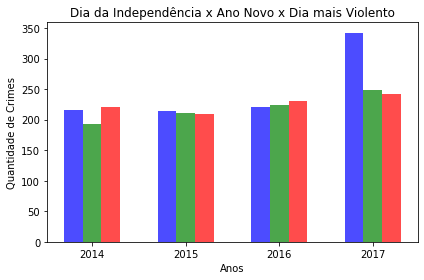

In [29]:

nY = (NYano2014.shape[0],NYano2015.shape[0],NYano2016.shape[0],NYano2017.shape[0])
iD = (IDano2014.shape[0],IDano2015.shape[0],IDano2016.shape[0],IDano2017.shape[0])

fig, ax = plt.subplots()
indice = np.arange(4)
bar_larg = 0.2
transp = 0.7


plt.bar(indice, nY, bar_larg, alpha=transp, color='blue', label='Ano Novo')

plt.bar(indice + bar_larg, iD, bar_larg, alpha=transp, color='green', label='Dia da Independência')

plt.bar(indice + 2*bar_larg, tops, bar_larg, alpha=transp, color='red', label='Dia mais violento do Ano')


plt.xlabel('Anos') 
plt.ylabel('Quantidade de Crimes') 
plt.title('Dia da Independência x Ano Novo x Dia mais Violento') 
plt.xticks(indice + bar_larg, ('2014', '2015', '2016', '2017')) 
# plt.legend() 
plt.tight_layout() 

plt.show()

Sendo assim, é visível que os dois feriados em questão, são sem dúvida um dia que deve gerar bastante preocupação para os norte americanos visto que o índice de violência tem se mantido alto, e até mesmo piorado.

# Conclusão do Relatório